<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.1.3

## Data

The Philippine Statistics Authority (PSA) spearheads the conduct of the Family Income and Expenditure Survey (FIES) nationwide. The survey, which is undertaken every three (3) years, is aimed at providing data on family income and expenditure, including, among others, levels of consumption by item of expenditure, sources of income in cash, and related information affecting income and expenditure levels and patterns in the Philippines.

You can download the data from [here](https://www.kaggle.com/grosvenpaul/family-income-and-expenditure).

The purpose of today's lab is to use simulation to visualize the sampling distribution for the sample mean. The Central Limit Theorem (CLT) tells us that as our sample size gets larger, the sampling distribution of the sample mean converges to a normal distribution. Therefore, when we have a large sample size, we can say that the sampling distribution for the sample mean is approximately normal, regardless of the distribution from which we are sampling.

Let's start by taking a look at the data, **`Total Household Income`** will serve as a "population" for the purposes of this lab. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
house_hold_csv = "data/Family Income and Expenditure.csv"
# Read CSV
household_df = pd.read_csv(house_hold_csv)

In [3]:
# Head
household_df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [4]:
# Tail
household_df.tail()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0
41543,128598,XII - SOCCSKSARGEN,78195,Enterpreneurial Activities,1,43485,41205,1985,7735,2062,...,0,0,0,0,0,1,0,0,0,0


In [6]:
# Shape
household_df.shape

(41544, 60)

In [12]:
# Data Types
household_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

#### Surveying the populations

##### 1. Create a histogram of `Total Household Income`.

Text(0.5, 0, 'Income in 10s of millions')

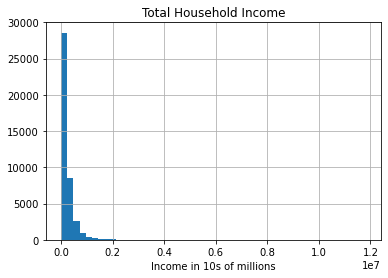

In [15]:
# ANSWER
household_df.hist('Total Household Income', bins=50)
plt.xlabel('Income in 10s of millions')

##### 2. How would you describe the shape of this population?

**ANSWER:**
The population is very heavily skewed to the right (positive skewness). The sample mean will be much greater than the median.

##### 2. What is the mean income of this population?

In [16]:
# ANSWER
household_df['Total Household Income'].mean()

247555.58480165608

##### 3. What sampling statistic/point estimate would you use to estimate the mean of this population if you were given a random sample from the population?

**ANSWER:**
The sample mean

#### Simulated sampling (sample means)

Now, we'd like to get an idea of what happens when we take multiple random samples of size 5. 

Take 10 sample (size=5) from the entire population. Calculate means for each sample. Now make a histogram of all the sample means.

- Describe the shape of the histogram.
- What is the center of the distribution of sample means?

##### 4. Simulation with `sample_size=5`

Take 10 samples, but with a sample size of 5.

In [18]:
# ANSWER
# Set sample size
sample_size = 5

# Initialise empty dataframe
df = pd.DataFrame()

# Create for loop for 10 sample distributions
for i in range(10):
    df[i] = household_df['Total Household Income'].sample(sample_size, ignore_index=True)

df.head()

,0,1,2,3,4,5,6,7,8,9
0,272906,144240,312298,143178,104873,96123,98820,294155,2216500,104905
1,141232,55555,107793,449552,105288,317566,390671,485060,510796,142285
2,70249,163910,52955,168507,157652,107669,103600,309325,327833,134618
3,41005,121456,107725,298770,96370,80740,37856,628110,71432,101452
4,208769,130564,192178,498167,71825,131462,72858,701011,260540,147620


###### 4.A Make a histogram of all the sample means

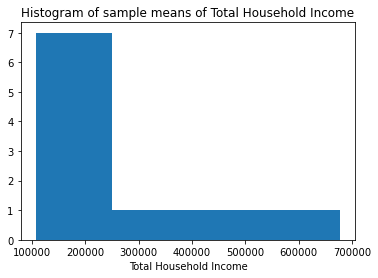

In [25]:
# ANSWER
# Assign means to object
sample_means = df.mean()

# Plot mean values on histogram
plt.hist(sample_means, bins=4)
plt.title('Histogram of sample means of Total Household Income')
plt.xlabel('Total Household Income')
plt.show()

###### 4.B Describe the shape of the histogram.

**ANSWER:**
The histogram of sample means is skewed to the right (positive skewness), but requires a very small amount of bins (fat histogram).

##### 7. Simulation with `sample_size=15`

let's try taking another 1000 samples, but with a sample size of 15

C:\Users\jacks\AppData\Local\Temp/ipykernel_9920/2595500780.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = household_df['Total Household Income'].sample(sample_size, ignore_index=True)


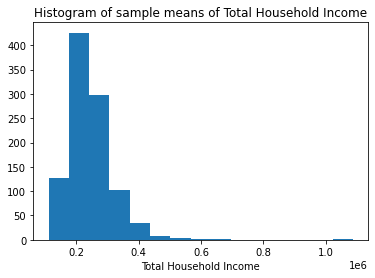

In [28]:
# ANSWER
# Set sample size
sample_size = 15

# Initialise empty dataframe
df = pd.DataFrame()

# Create for loop for 10 sample distributions
for i in range(1000):
    df[i] = household_df['Total Household Income'].sample(sample_size, ignore_index=True)

# Assign means to object
sample_means = df.mean()

# Plot mean values on histogram
plt.hist(sample_means, bins=15)
plt.title('Histogram of sample means of Total Household Income')
plt.xlabel('Total Household Income')
plt.show()



##### 8. Simulation with `sample_size=50`

Let's try taking another 1000 samples, but with a sample size of 50

C:\Users\jacks\AppData\Local\Temp/ipykernel_9920/1289430392.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = household_df['Total Household Income'].sample(sample_size, ignore_index=True)


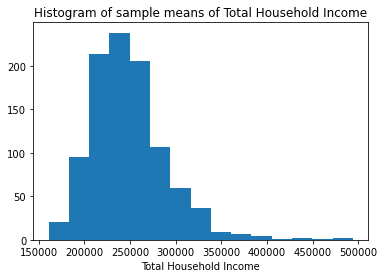

In [29]:
# ANSWER
sample_size = 50

# Initialise empty dataframe
df = pd.DataFrame()

# Create for loop for 10 sample distributions
for i in range(1000):
    df[i] = household_df['Total Household Income'].sample(sample_size, ignore_index=True)

# Assign means to object
sample_means = df.mean()

# Plot mean values on histogram
plt.hist(sample_means, bins=15)
plt.title('Histogram of sample means of Total Household Income')
plt.xlabel('Total Household Income')
plt.show()


###### 8.A Describe the shape of the histogram of sample means (using sample size of 50)

**ANSWER:**
The shape of the sample means distribution is skewed to the right (positive skewness), though less extreme than shown in the distribution of sample means with a smaller sample size.

###### 8.B What is mean of the distribution of sample means?

In [30]:
# ANSWER
sample_means.mean()

248870.42426000032

**ANSWER:**

> If repeated random samples of a given size n are taken from a population of values for a quantitative variable, where the population mean is μ (mu) and the population standard deviation is σ (sigma) then the mean of all sample means (x-bars) is population mean μ (mu).

###### 8.C As the sample size grew, did your results confirm the CLT?

**ANSWER:**

A larger sample size reduced the skewness of the sample mean distribution, making it more similar to a normal distribution. This confirms the CLT.



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



